In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [316]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [317]:
test=pd.read_csv('../input/titanic/test.csv',usecols=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
train=pd.read_csv('../input/titanic/train.csv',usecols=['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [318]:
print(test.info())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp

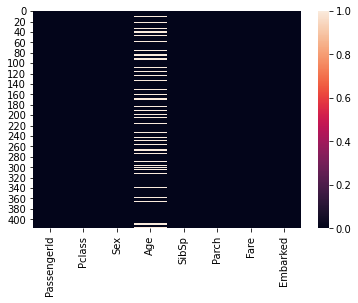

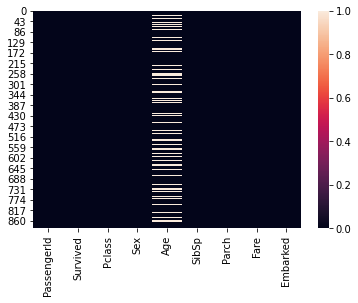

In [319]:
sns.heatmap(test.isna())
plt.show()
sns.heatmap(train.isna())
plt.show()

In [320]:
print(test.duplicated().sum())
print(train.duplicated().sum())

0
0


In [321]:
print(test.columns)
print(train.columns)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

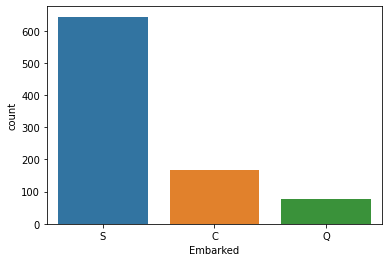

In [322]:
sns.countplot(train['Embarked'])

In [323]:
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Fare']=train['Fare'].fillna(train['Fare'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [324]:
print(test.isna().sum())
print(train.isna().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [325]:
tt=pd.concat([train,test],axis=0)

In [326]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [327]:
cat=[x for x in tt.columns if tt[x].dtype=="O"]
print(cat)

['Sex', 'Embarked']


In [328]:
cat_col=['Sex', 'Embarked']
tt[cat_col]=tt[cat_col].apply(lc.fit_transform)

In [329]:
tt.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [330]:
df_train=tt.iloc[0:891:,]
df_test=tt.iloc[891:,]
df_test=df_test.drop(['PassengerId','Survived'],axis=1)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [331]:
x=df_train.drop(['Survived','PassengerId'],axis=1)
y=df_train['Survived']
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [354]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=20)
y_test

347    1.0
674    0.0
791    0.0
836    0.0
56     1.0
      ... 
7      0.0
20     0.0
783    0.0
59     0.0
342    0.0
Name: Survived, Length: 90, dtype: float64

In [333]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [334]:
model.fit(x,y)

LogisticRegression()

In [356]:
y_pred=model.predict(x_test)
y_pred.shape

(90,)

In [336]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_pred,y_test)

array([[50,  7],
       [ 7, 26]])

In [337]:
np.mean(y_pred==y_test)

0.8444444444444444

In [338]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88        57
         1.0       0.79      0.79      0.79        33

    accuracy                           0.84        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.84      0.84      0.84        90



In [364]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log,Roc_curve= roc_auc_score(y_test, model.predict (x_test))
fpr,tpr,thresholds=roc_curve(y_pred,model.predict_proba(x_test))


import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='red', label='model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


TypeError: cannot unpack non-iterable numpy.float64 object

In [339]:
df=model.predict(df_test)
df1=test.iloc[:,0]
gender_submission=pd.DataFrame(df,df1)
gender_submission

,0
PassengerId,
892,0.0
893,0.0
894,0.0
895,0.0
896,1.0
...,...
1305,0.0
1306,1.0
1307,0.0


In [341]:
gender_submission=gender_submission.rename({0:'survived'},axis=1)

In [342]:
gender_submission

,survived
PassengerId,
892,0.0
893,0.0
894,0.0
895,0.0
896,1.0
...,...
1305,0.0
1306,1.0
1307,0.0


In [365]:
gender_submission.to_csv('gender_submission.csv')